In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score,classification_report,accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn import tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.feature_selection import f_regression


#### Data Analysis and Preprocessing

In [2]:
df1 = pd.read_csv('supermarket-sales-data.csv')
df1

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3
...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,UPI,6.2
996,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,UPI,4.4
997,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,7.7
998,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,4.1


In [3]:
df1.shape

(1000, 11)

In [4]:
df1.dtypes

InvoiceID        object
Branch           object
CustomerType     object
Gender           object
ProductType      object
UnitPrice       float64
Quantity          int64
Tax             float64
Total           float64
PaymentType      object
Rating          float64
dtype: object

In [5]:
df1.describe()

,UnitPrice,Quantity,Tax,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,6.97270
std,26.494628,2.923431,11.708825,245.885335,1.71858
min,10.080000,1.000000,0.508500,10.678500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,5.50000
50%,55.230000,5.000000,12.088000,253.848000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,10.00000


In [6]:
df1.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [7]:
df1.isna().sum()

InvoiceID       0
Branch          0
CustomerType    0
Gender          0
ProductType     0
UnitPrice       0
Quantity        0
Tax             0
Total           0
PaymentType     0
Rating          0
dtype: int64

<Axes: >

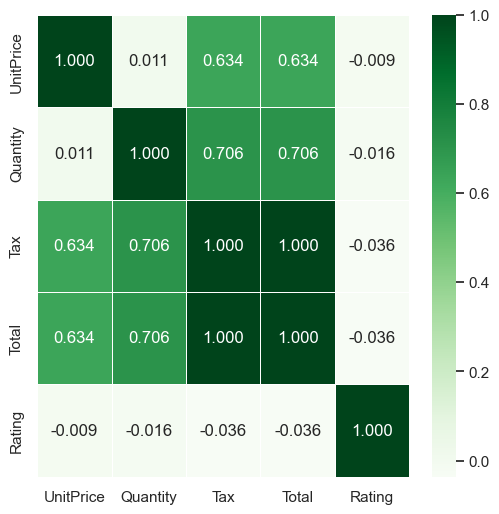

In [8]:
num_data = df1.iloc[:,1:].select_dtypes(include = ["int64","float64"])
sns.set_theme(rc={'figure.figsize':(6,6)})
sns.heatmap(num_data.corr(),annot=True,cmap="Greens",linewidths=0.4,fmt=".3f")

In [9]:
df1.columns

Index(['InvoiceID', 'Branch', 'CustomerType', 'Gender', 'ProductType',
       'UnitPrice', 'Quantity', 'Tax', 'Total', 'PaymentType', 'Rating'],
      dtype='object')

#### Encoding Data to numeric for Gender Prediction

In [10]:
enc = OneHotEncoder(sparse_output=False)
encoded_data = enc.fit_transform(df1[['Branch', 'CustomerType', 'ProductType', 'PaymentType']])
encoded_df = pd.DataFrame(
    encoded_data,columns= enc.get_feature_names_out(['Branch', 'CustomerType', 'ProductType', 'PaymentType'])
)

encoded_df

,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [11]:
for cols in encoded_df:
    df1[cols] = encoded_df[cols]

df1

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,...,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,UPI,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,UPI,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [12]:
df1.drop(['Branch', 'CustomerType', 'ProductType', 'PaymentType'], axis=1, inplace=True)
df1

,InvoiceID,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,...,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,Female,74.69,7,26.1415,548.9715,9.1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,Female,15.28,5,3.8200,80.2200,9.6,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,Male,46.33,7,16.2155,340.5255,7.4,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,Male,58.22,8,23.2880,489.0480,8.4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,Male,86.31,7,30.2085,634.3785,5.3,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Male,40.35,1,2.0175,42.3675,6.2,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,303-96-2227,Female,97.38,10,48.6900,1022.4900,4.4,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,727-02-1313,Male,31.84,1,1.5920,33.4320,7.7,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,347-56-2442,Male,65.82,1,3.2910,69.1110,4.1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [13]:
label_encoder = preprocessing.LabelEncoder()
df1['Gender']= label_encoder.fit_transform(df1['Gender'])
df1

,InvoiceID,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,...,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,0,74.69,7,26.1415,548.9715,9.1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,0,15.28,5,3.8200,80.2200,9.6,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,1,46.33,7,16.2155,340.5255,7.4,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,1,58.22,8,23.2880,489.0480,8.4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,1,86.31,7,30.2085,634.3785,5.3,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,1,40.35,1,2.0175,42.3675,6.2,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,303-96-2227,0,97.38,10,48.6900,1022.4900,4.4,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,727-02-1313,1,31.84,1,1.5920,33.4320,7.7,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,347-56-2442,1,65.82,1,3.2910,69.1110,4.1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
df1.dtypes

InvoiceID                              object
Gender                                  int32
UnitPrice                             float64
Quantity                                int64
Tax                                   float64
Total                                 float64
Rating                                float64
Branch_A                              float64
Branch_B                              float64
Branch_C                              float64
CustomerType_Member                   float64
CustomerType_Normal                   float64
ProductType_Electronic accessories    float64
ProductType_Fashion accessories       float64
ProductType_Food and beverages        float64
ProductType_Health and beauty         float64
ProductType_Home and lifestyle        float64
ProductType_Sports and travel         float64
PaymentType_Cash                      float64
PaymentType_Credit card               float64
PaymentType_UPI                       float64
dtype: object

In [15]:
df1.shape

(1000, 21)

<Axes: >

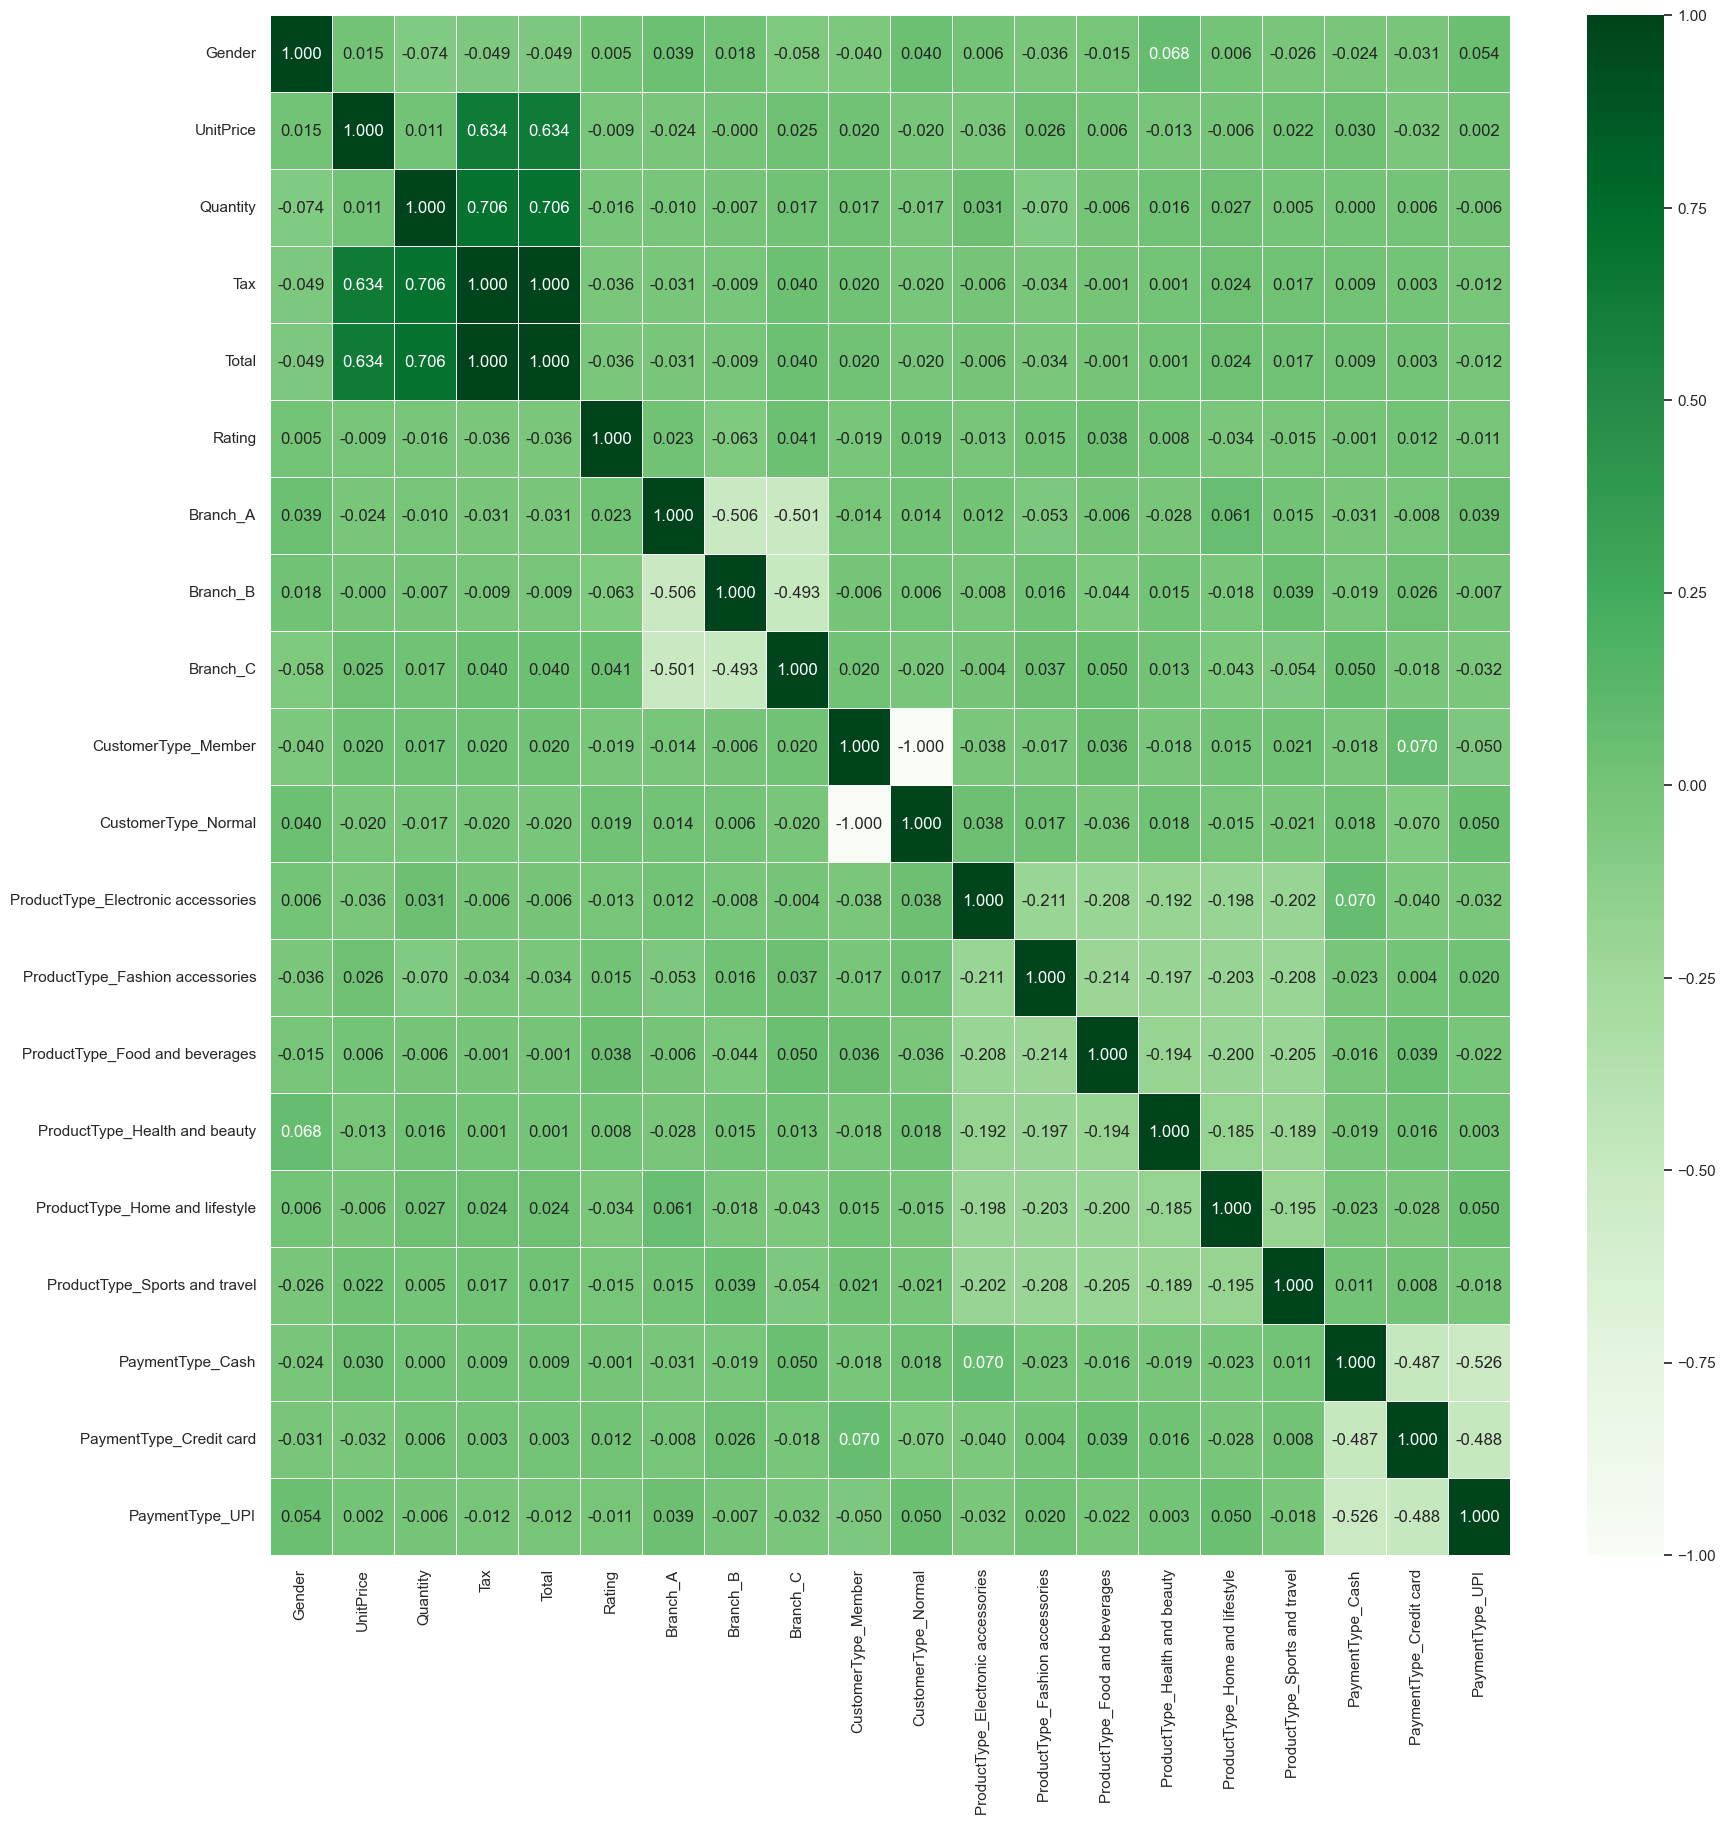

In [16]:
num_data = df1.iloc[:,1:].select_dtypes(include = ["int64","float64","int32"])
sns.set_theme(rc={'figure.figsize':(20,20)})
sns.heatmap(num_data.corr(),annot=True,cmap="Greens",linewidths=0.4,fmt=".3f")

#### 

In [17]:
df1.isna().sum()

InvoiceID                             0
Gender                                0
UnitPrice                             0
Quantity                              0
Tax                                   0
Total                                 0
Rating                                0
Branch_A                              0
Branch_B                              0
Branch_C                              0
CustomerType_Member                   0
CustomerType_Normal                   0
ProductType_Electronic accessories    0
ProductType_Fashion accessories       0
ProductType_Food and beverages        0
ProductType_Health and beauty         0
ProductType_Home and lifestyle        0
ProductType_Sports and travel         0
PaymentType_Cash                      0
PaymentType_Credit card               0
PaymentType_UPI                       0
dtype: int64

In [18]:
scaled_df = StandardScaler().fit_transform(df1.iloc[:,1:].values)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df1.iloc[:,1:].columns
scaled_df

,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,-0.998002,0.718160,0.509930,0.919607,0.919607,1.238443,1.393261,-0.704987,-0.698638,0.998002,-0.998002,-0.452570,-0.465344,-0.45897,2.361980,-0.436436,-0.44614,-0.724148,-0.671847,1.377879
1,-0.998002,-1.525303,-0.174540,-0.987730,-0.987730,1.529527,-0.717741,-0.704987,1.431356,-1.002002,1.002002,2.209605,-0.465344,-0.45897,-0.423374,-0.436436,-0.44614,1.380933,-0.671847,-0.725753
2,1.002002,-0.352781,0.509930,0.071446,0.071446,0.248760,1.393261,-0.704987,-0.698638,-1.002002,1.002002,-0.452570,-0.465344,-0.45897,-0.423374,2.291288,-0.44614,-0.724148,1.488433,-0.725753
3,1.002002,0.096214,0.852165,0.675780,0.675780,0.830927,1.393261,-0.704987,-0.698638,0.998002,-0.998002,-0.452570,-0.465344,-0.45897,2.361980,-0.436436,-0.44614,-0.724148,-0.671847,1.377879
4,1.002002,1.156959,0.509930,1.267125,1.267125,-0.973790,1.393261,-0.704987,-0.698638,-1.002002,1.002002,-0.452570,-0.465344,-0.45897,-0.423374,-0.436436,2.24145,-0.724148,-0.671847,1.377879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.002002,-0.578600,-1.543480,-1.141750,-1.141750,-0.449840,-0.717741,-0.704987,1.431356,-1.002002,1.002002,-0.452570,-0.465344,-0.45897,2.361980,-0.436436,-0.44614,-0.724148,-0.671847,1.377879
996,-0.998002,1.574989,1.536635,2.846340,2.846340,-1.497741,-0.717741,1.418467,-0.698638,-1.002002,1.002002,-0.452570,-0.465344,-0.45897,-0.423374,2.291288,-0.44614,-0.724148,-0.671847,1.377879
997,1.002002,-0.899958,-1.543480,-1.178109,-1.178109,0.423410,1.393261,-0.704987,-0.698638,0.998002,-0.998002,-0.452570,-0.465344,2.17879,-0.423374,-0.436436,-0.44614,1.380933,-0.671847,-0.725753
998,1.002002,0.383208,-1.543480,-1.032932,-1.032932,-1.672391,1.393261,-0.704987,-0.698638,-1.002002,1.002002,-0.452570,-0.465344,-0.45897,-0.423374,2.291288,-0.44614,1.380933,-0.671847,-0.725753


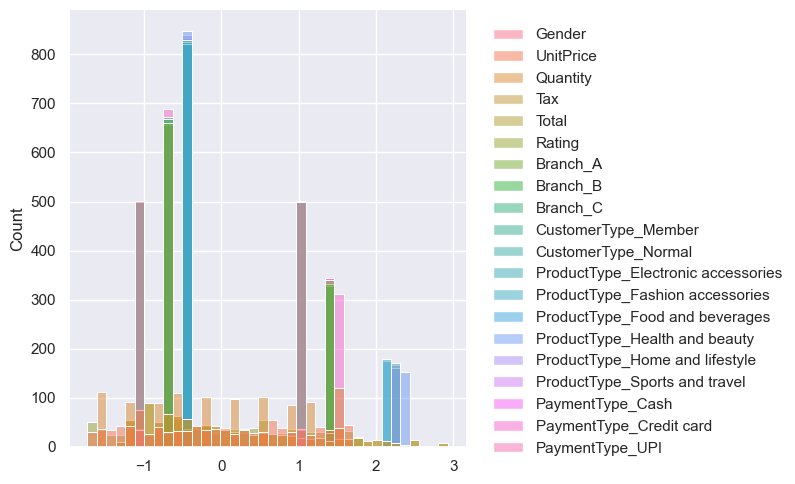

In [19]:
sns.set_theme(rc={'figure.figsize':(30, 20)})
sns.displot(scaled_df)

<Axes: >

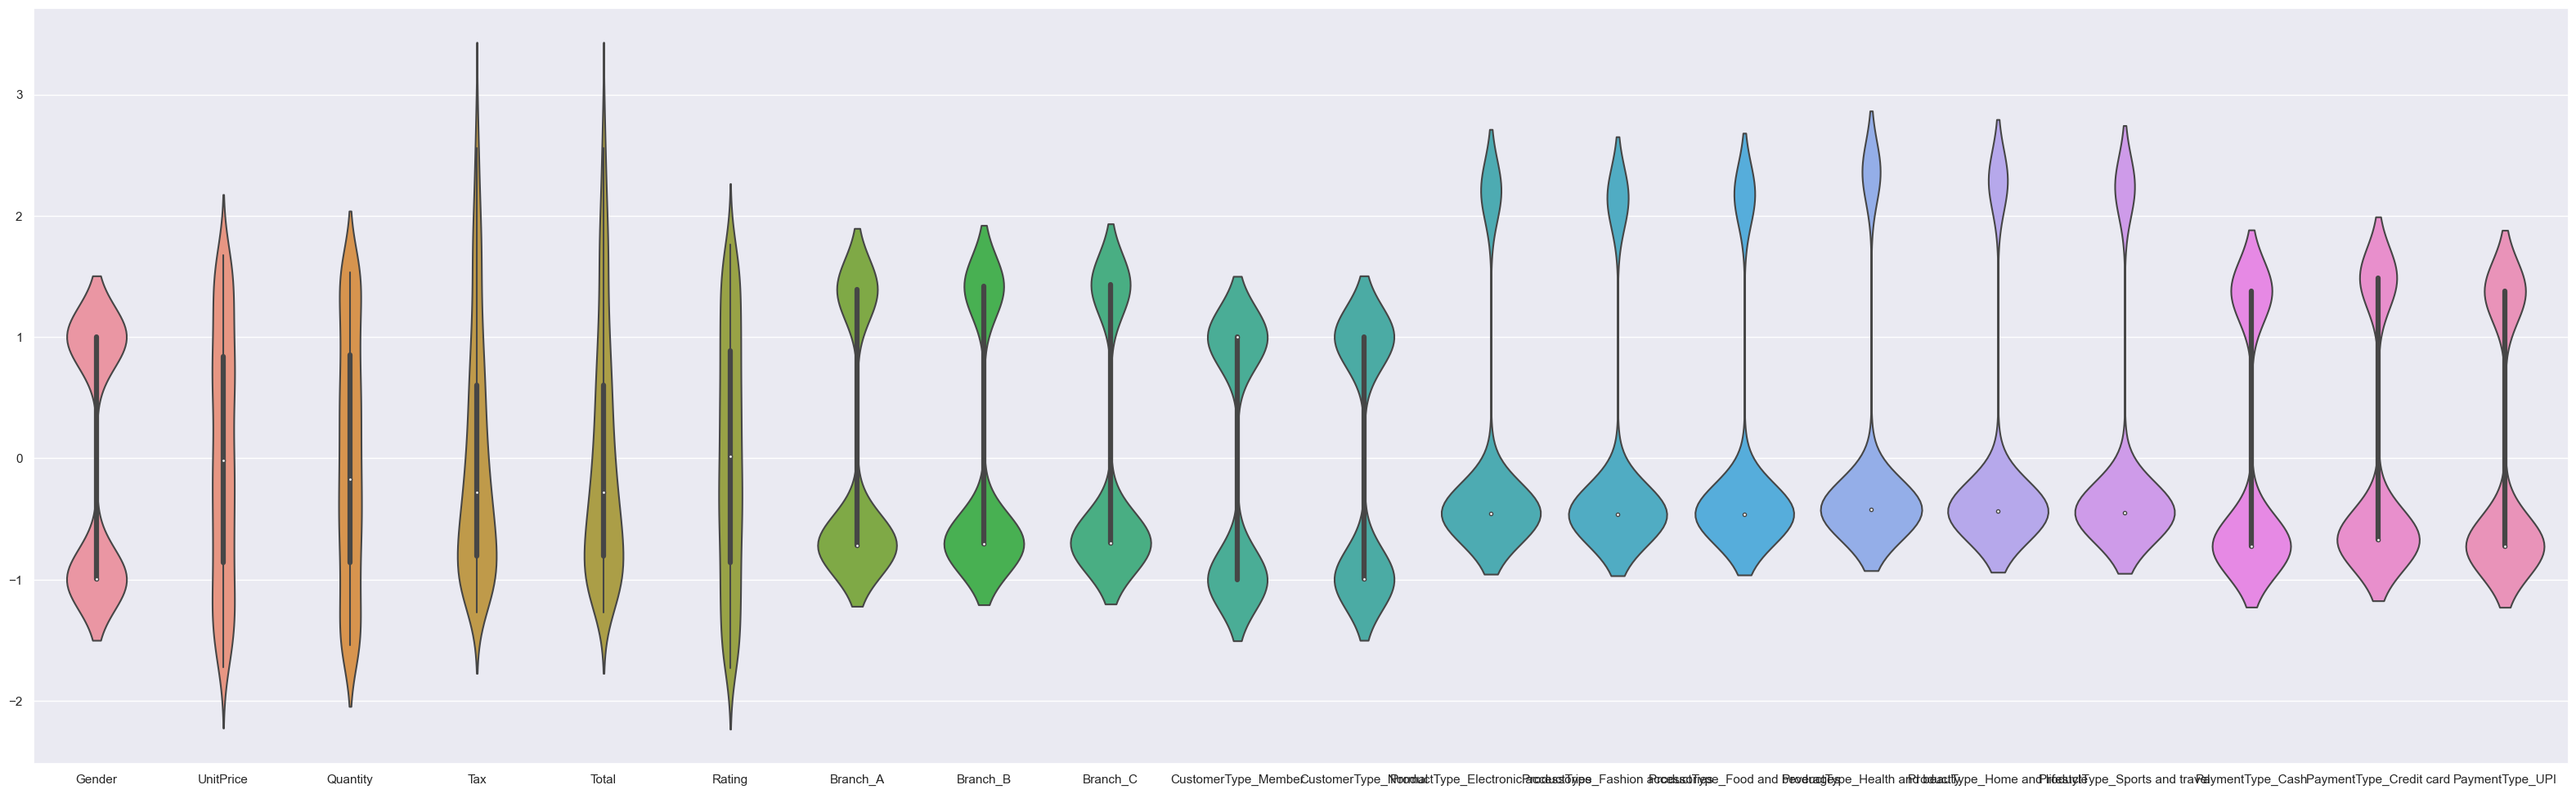

In [20]:
sns.set_theme(rc={'figure.figsize':(40,12)})
sns.violinplot(scaled_df)

<Axes: >

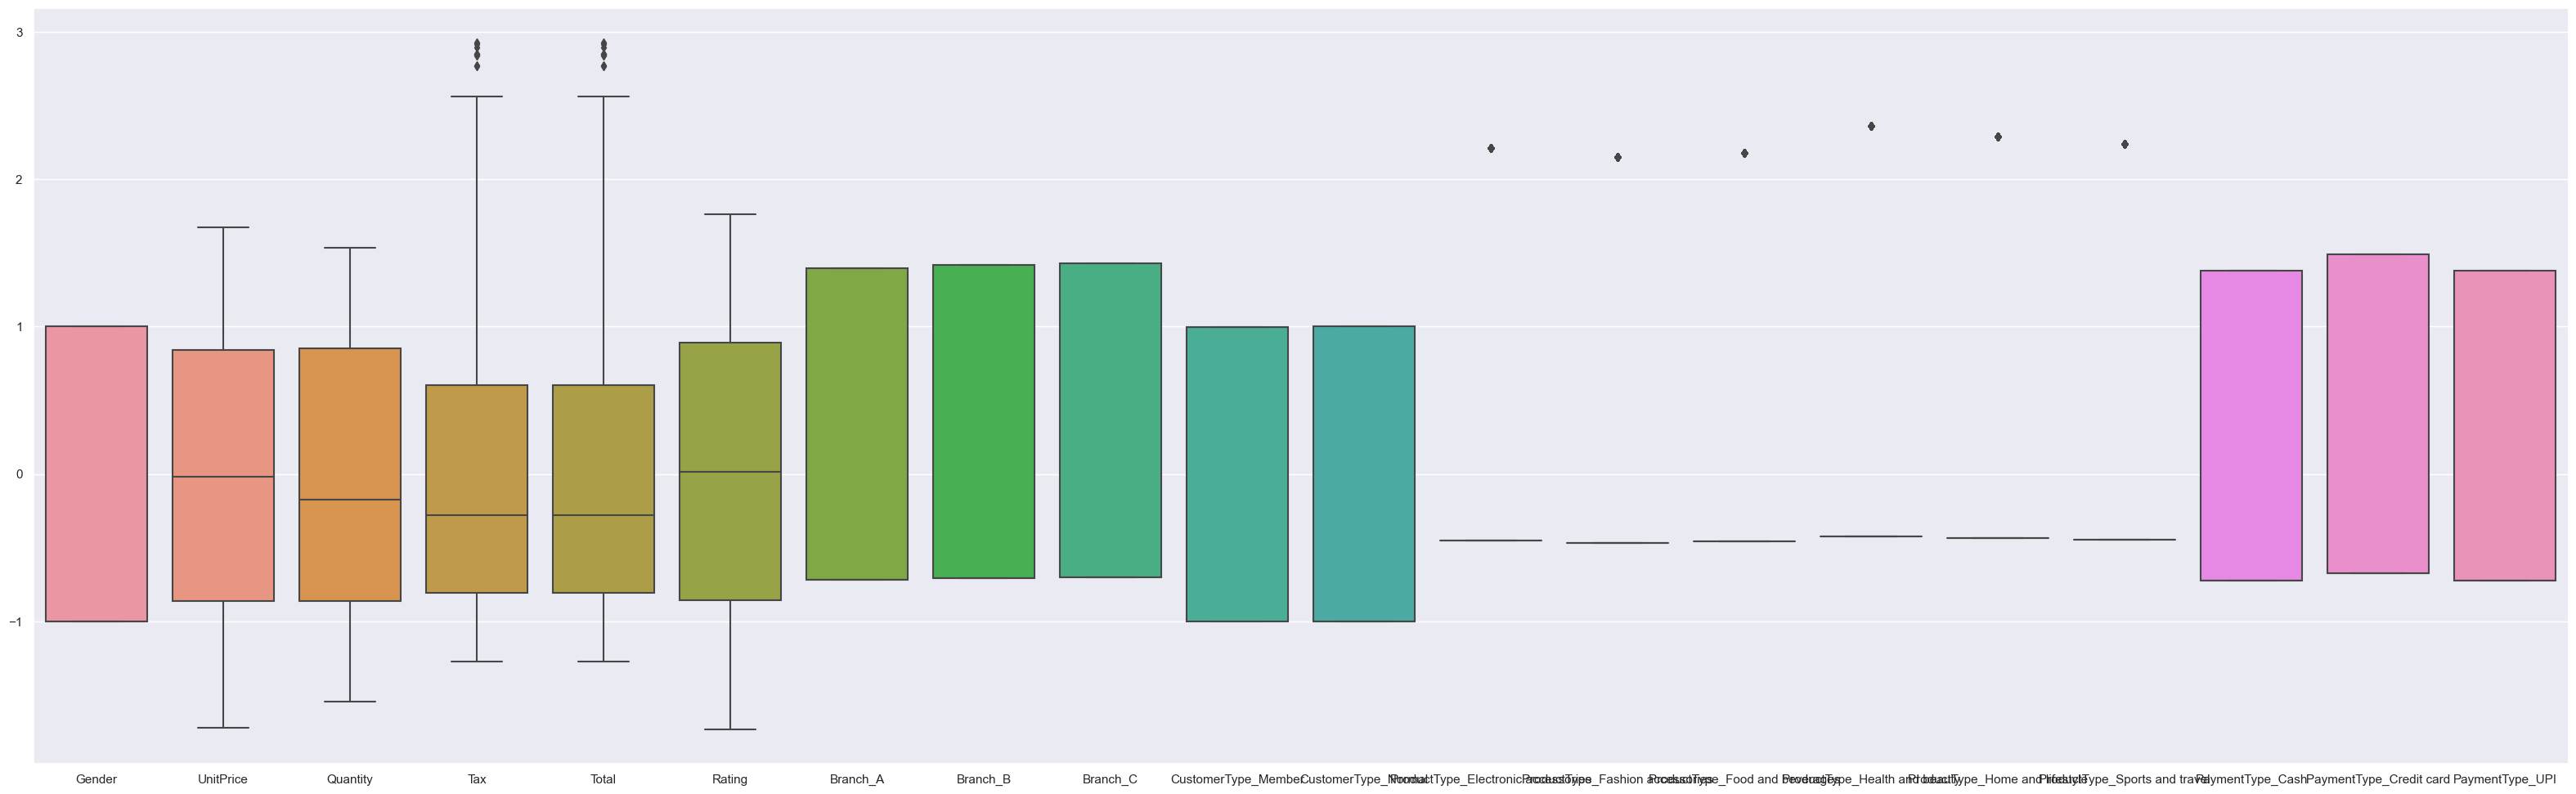

In [21]:
sns.boxplot(scaled_df)

#### Using DBScan

In [22]:
dbscan = DBSCAN(eps = 1,min_samples = 100)
model = dbscan.fit(scaled_df)
labels = model.labels_

# -1 value in anomaly_score column signifies that the data is anomalous
scaled_df["anomaly_score"] = labels
anomalies = scaled_df[scaled_df.anomaly_score == -1]
anomalies.shape

(1000, 21)

Outlier detected in features Tax and Total from plots

In [23]:
# IQR method on Tax
Q1 = np.percentile(df1['Tax'], 25, method='midpoint')
Q3 = np.percentile(df1['Tax'], 75, method='midpoint')
IQR = (Q3 - Q1)
print(IQR)
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

df1 = df1[df1['Tax'] <= upper]
print(df1.shape)
df1 = df1[df1['Tax'] >= lower]
print(df1.shape)

df1

16.56575
(991, 21)
(991, 21)


,InvoiceID,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,...,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,0,74.69,7,26.1415,548.9715,9.1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,0,15.28,5,3.8200,80.2200,9.6,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,1,46.33,7,16.2155,340.5255,7.4,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,1,58.22,8,23.2880,489.0480,8.4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,1,86.31,7,30.2085,634.3785,5.3,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,0,60.95,1,3.0475,63.9975,5.9,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
995,233-67-5758,1,40.35,1,2.0175,42.3675,6.2,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,727-02-1313,1,31.84,1,1.5920,33.4320,7.7,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,347-56-2442,1,65.82,1,3.2910,69.1110,4.1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [24]:
# IQR method on Total
Q1 = np.percentile(df1['Total'], 25, method='midpoint')
Q3 = np.percentile(df1['Total'], 75, method='midpoint')
IQR = (Q3 - Q1)
print(IQR)
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

df1 = df1[df1['Total'] <= upper]
print(df1.shape)
df1 = df1[df1['Total'] >= lower]
print(df1.shape)

df1

342.4995
(991, 21)
(991, 21)


,InvoiceID,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,...,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,0,74.69,7,26.1415,548.9715,9.1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,0,15.28,5,3.8200,80.2200,9.6,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,1,46.33,7,16.2155,340.5255,7.4,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,1,58.22,8,23.2880,489.0480,8.4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,1,86.31,7,30.2085,634.3785,5.3,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,0,60.95,1,3.0475,63.9975,5.9,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
995,233-67-5758,1,40.35,1,2.0175,42.3675,6.2,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,727-02-1313,1,31.84,1,1.5920,33.4320,7.7,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,347-56-2442,1,65.82,1,3.2910,69.1110,4.1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Outliers are now removed

## For Gender Prediction

#### Train Test Split

In [25]:
train_cols = list(df1.columns)
train_cols.remove('Gender')
train_cols.remove('InvoiceID')
train_cols

['UnitPrice',
 'Quantity',
 'Tax',
 'Total',
 'Rating',
 'Branch_A',
 'Branch_B',
 'Branch_C',
 'CustomerType_Member',
 'CustomerType_Normal',
 'ProductType_Electronic accessories',
 'ProductType_Fashion accessories',
 'ProductType_Food and beverages',
 'ProductType_Health and beauty',
 'ProductType_Home and lifestyle',
 'ProductType_Sports and travel',
 'PaymentType_Cash',
 'PaymentType_Credit card',
 'PaymentType_UPI']

In [26]:
X = df1[columns := train_cols] # customer id is excluded as it is independent of InvoiceID
y = df1['Gender'] # feature to be predicted
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 20% is for test data

In [27]:
df1['Gender'].unique()

array([0, 1])

In [28]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(40,40))
    _ = tree.plot_tree(dt_classifier,feature_names=train_cols, class_names=['Female', 'Male'], filled=True)

In [29]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

#### Using Decision Trees

In [30]:
dtc = DecisionTreeClassifier(max_depth=4)
## fitiing on train set
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

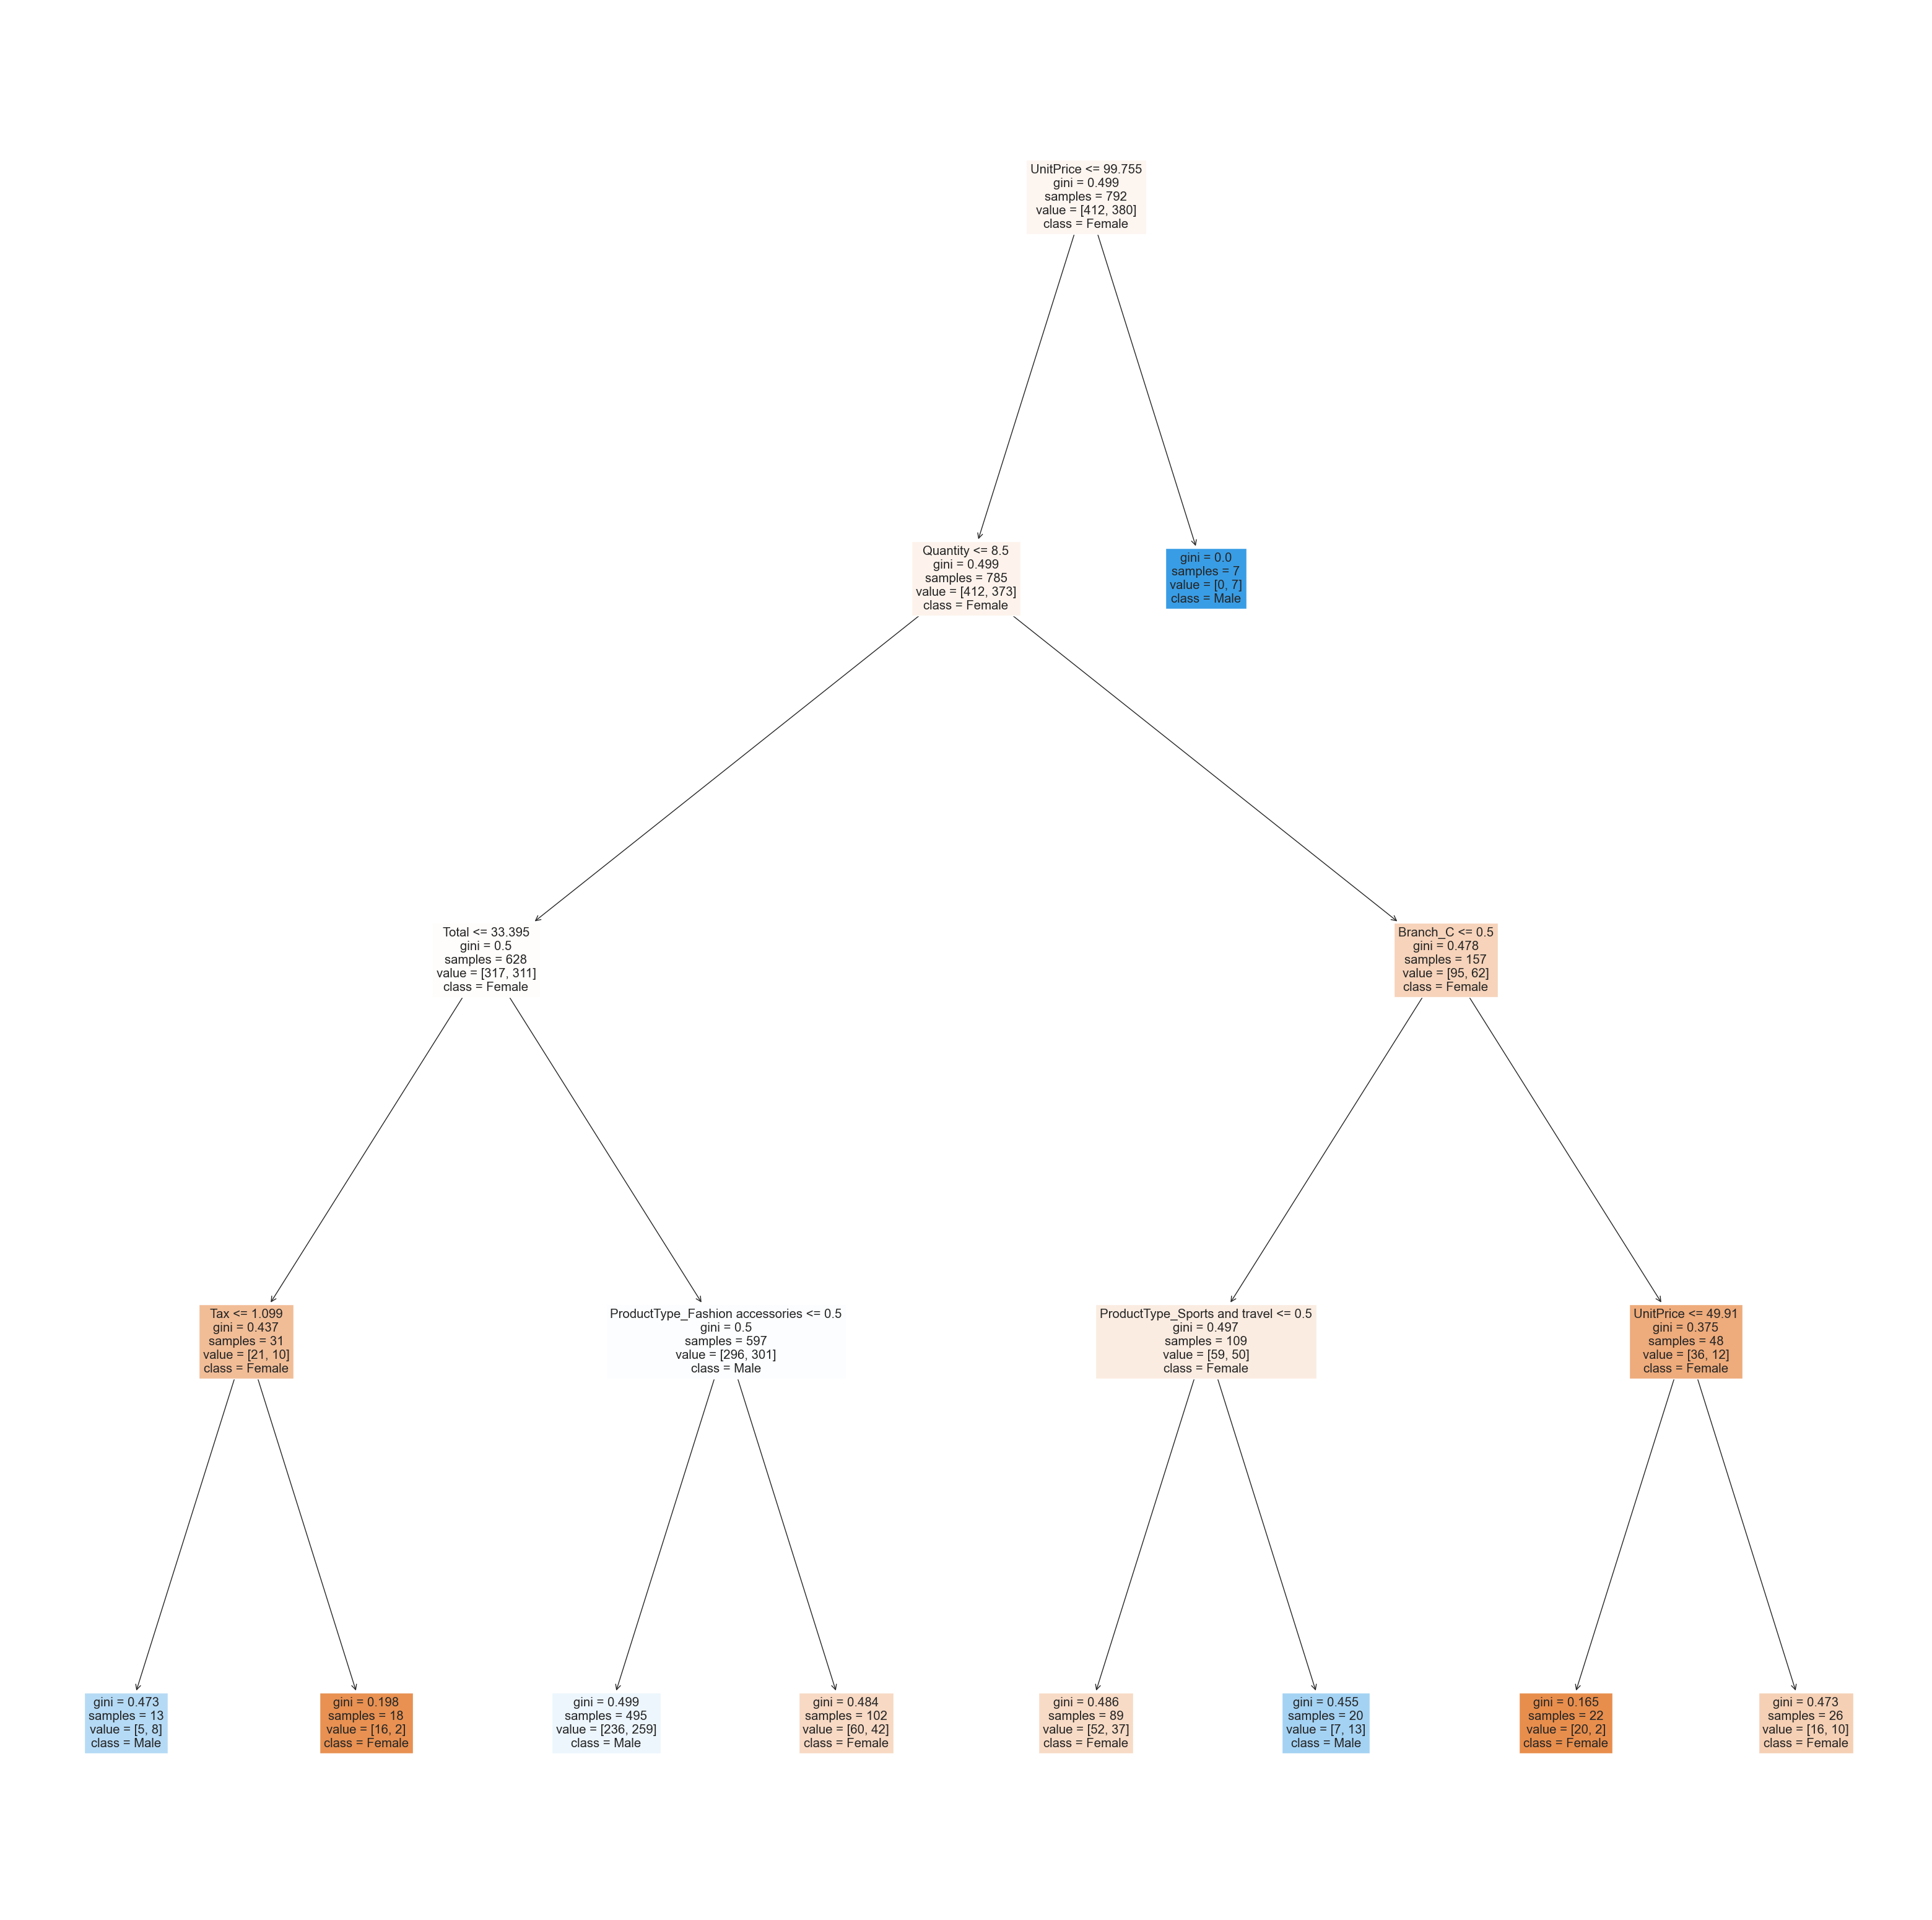

In [31]:
gph = get_dt_graph(dtc)

In [32]:
evaluate_model(dtc)

Train Accuracy : 0.5694444444444444
Train Confusion Matrix:
[[164 248]
 [ 93 287]]
--------------------------------------------------
Test Accuracy : 0.5125628140703518
Test Confusion Matrix:
[[29 54]
 [43 73]]


##### Using Hyper-parameter Tuning

In [33]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [i for i in range(1,20)],
    'min_samples_leaf': [i for i in range(1,100)],
    'criterion': ["gini", "entropy"]
}

In [34]:
dtc_clf = DecisionTreeClassifier(random_state=42)

In [35]:
grid_search = GridSearchCV(estimator=dtc_clf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [36]:
%%time
## fitting on train set
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 3762 candidates, totalling 15048 fits
CPU times: total: 10.1 s
Wall time: 1min 9s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy', verbose=1)

In [37]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 38}

In [38]:
dtc_best = grid_search.best_estimator_
dtc_best

DecisionTreeClassifier(max_depth=4, min_samples_leaf=38, random_state=42)

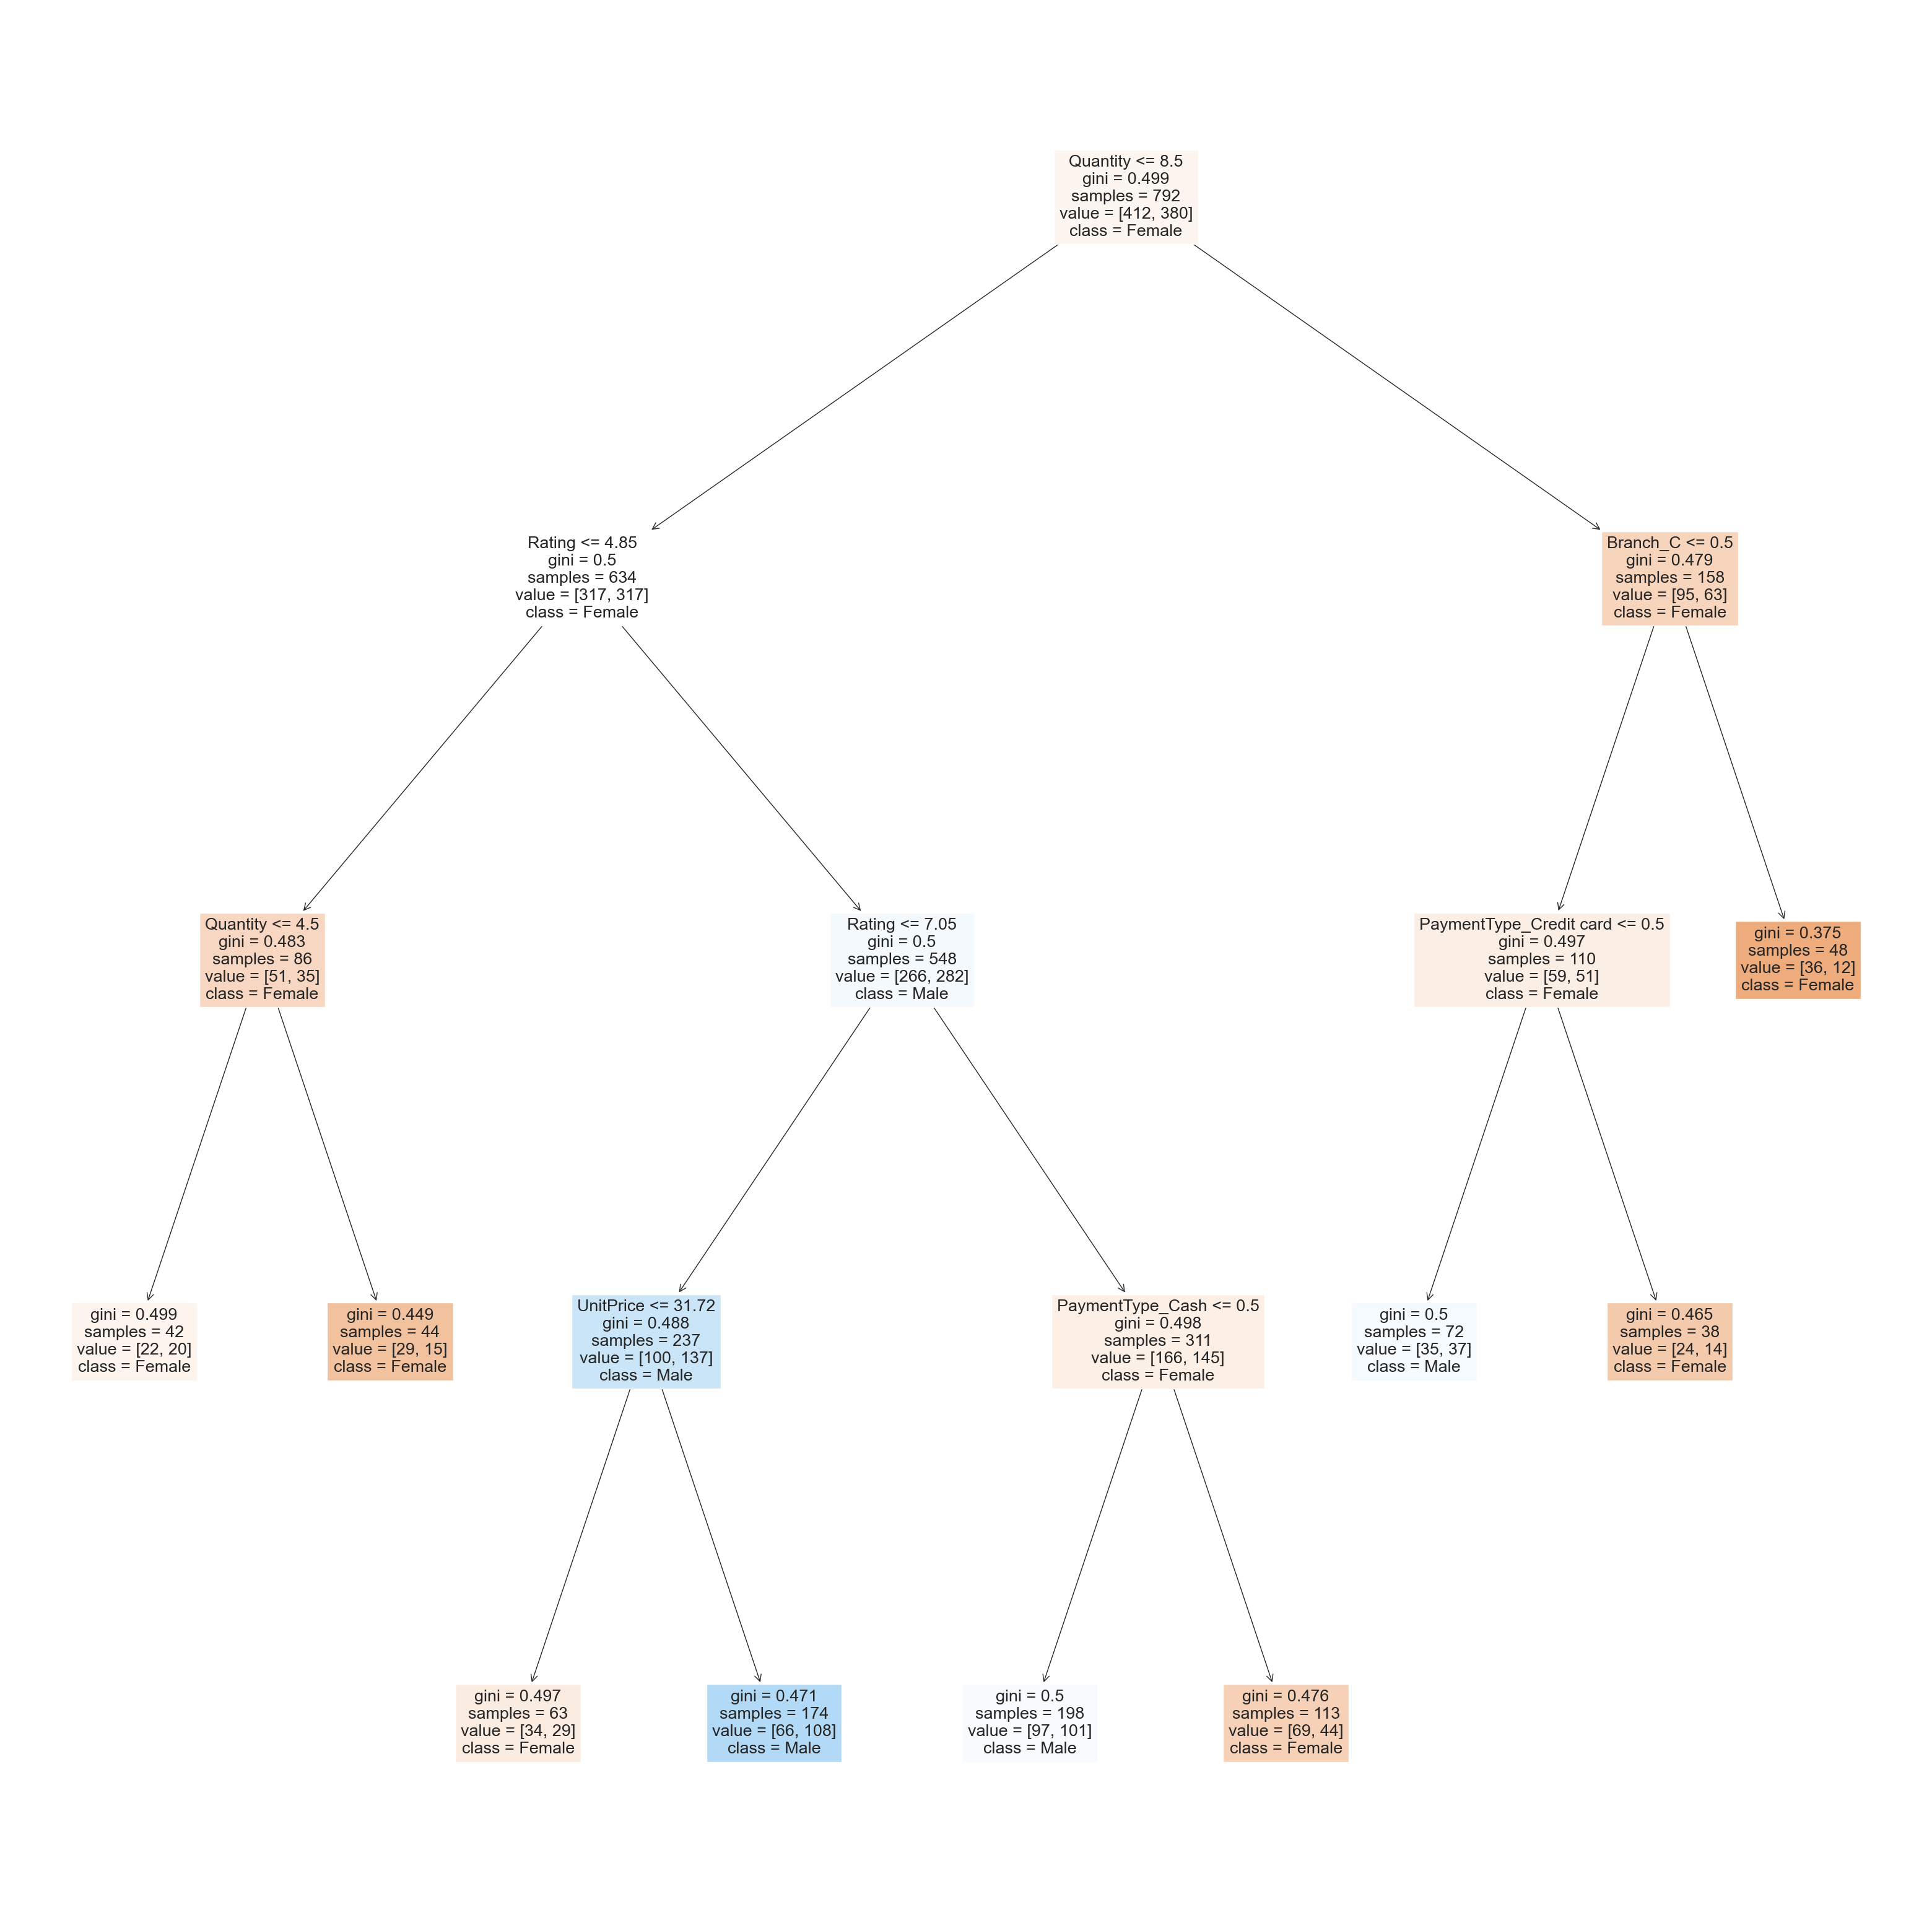

In [39]:
get_dt_graph(dtc_best)

In [40]:
evaluate_model(dtc_best)

Train Accuracy : 0.5808080808080808
Train Confusion Matrix:
[[214 198]
 [134 246]]
--------------------------------------------------
Test Accuracy : 0.5577889447236181
Test Confusion Matrix:
[[36 47]
 [41 75]]


In [41]:
print(classification_report(y_test, dtc_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.47      0.43      0.45        83
           1       0.61      0.65      0.63       116

    accuracy                           0.56       199
   macro avg       0.54      0.54      0.54       199
weighted avg       0.55      0.56      0.56       199



In [42]:
## confusion matrix for train data
confusion_matrix(y_train,dtc_best.predict(X_train))

array([[214, 198],
       [134, 246]], dtype=int64)

In [43]:
## confusion matrix for test data
confusion_matrix(y_test,dtc_best.predict(X_test))

array([[36, 47],
       [41, 75]], dtype=int64)

In [44]:
## accuracy, precision, recall, f1-score
print("accuracy is ",dtc_best.score(X_test,y_test))
print("precision is ",precision_score(y_test,dtc_best.predict(X_test)))
print("recall is ",recall_score(y_test,dtc_best.predict(X_test)))
print("F1 score is ",f1_score(y_test,dtc_best.predict(X_test)))

accuracy is  0.5577889447236181
precision is  0.6147540983606558
recall is  0.646551724137931
F1 score is  0.6302521008403362


#### Using Random Forest

In [45]:
rfc = RandomForestClassifier(max_depth=5)
## fittin gon train set
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [46]:
evaluate_model(rfc)

Train Accuracy : 0.7803030303030303
Train Confusion Matrix:
[[349  63]
 [111 269]]
--------------------------------------------------
Test Accuracy : 0.5125628140703518
Test Confusion Matrix:
[[56 27]
 [70 46]]


##### Using Hyper-parameter Tuning

In [47]:
# Create the parameter grid based on the results of random search 
params = { 
    'n_estimators': [i for i in range(50, 250, 50)], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [i for i in range(3,10)], 
    'max_leaf_nodes': [i for i in range(5,20,5)], 
} 

In [48]:
rfc_clf = RandomForestClassifier(random_state=42)

In [49]:
grid_search = GridSearchCV(estimator=rfc_clf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [50]:
%%time
## fitting on train set
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 252 candidates, totalling 1008 fits
CPU times: total: 3 s
Wall time: 2min 28s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [5, 10, 15],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [51]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': 15,
 'n_estimators': 50}

In [52]:
rfc_best = grid_search.best_estimator_

In [53]:
evaluate_model(rfc_best)

Train Accuracy : 0.7462121212121212
Train Confusion Matrix:
[[350  62]
 [139 241]]
--------------------------------------------------
Test Accuracy : 0.5477386934673367
Test Confusion Matrix:
[[60 23]
 [67 49]]


In [54]:
## confusion matrix for train data
confusion_matrix(y_train,rfc_best.predict(X_train))

array([[350,  62],
       [139, 241]], dtype=int64)

In [55]:
## confusion matrix for test data
confusion_matrix(y_test,rfc_best.predict(X_test))

array([[60, 23],
       [67, 49]], dtype=int64)

In [56]:
## accuracy, precision, recall, f1-score
print("accuracy is ",rfc_best.score(X_test,y_test))
print("precision is ",precision_score(y_test,rfc_best.predict(X_test)))
print("recall is ",recall_score(y_test,rfc_best.predict(X_test)))
print("F1 score is ",f1_score(y_test,rfc_best.predict(X_test)))

accuracy is  0.5477386934673367
precision is  0.6805555555555556
recall is  0.4224137931034483
F1 score is  0.5212765957446809


## For Rating Prediction

In [57]:
df2 = pd.read_csv('supermarket-sales-data.csv') ## in rating I will use df2 in place of df1

In [58]:
df2.isna().sum()

InvoiceID       0
Branch          0
CustomerType    0
Gender          0
ProductType     0
UnitPrice       0
Quantity        0
Tax             0
Total           0
PaymentType     0
Rating          0
dtype: int64

In [59]:
df2

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3
...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,UPI,6.2
996,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,UPI,4.4
997,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,7.7
998,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,4.1


### Encoding data to numeric for Rating Prediction

In [60]:
## OneHotEncoding is now done on gender as well as it is not the target vairable now
enc = OneHotEncoder(sparse_output=False)
encoded_data = enc.fit_transform(df2[['Branch', 'Gender', 'CustomerType', 'ProductType', 'PaymentType']])
encoded_df = pd.DataFrame(
    encoded_data,columns= enc.get_feature_names_out(['Branch', 'Gender', 'CustomerType', 'ProductType', 'PaymentType'])
)

encoded_df

,Branch_A,Branch_B,Branch_C,Gender_Female,Gender_Male,CustomerType_Member,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [61]:
for cols in encoded_df:
    df2[cols] = encoded_df[cols]

In [62]:
df2.drop(['Branch', 'Gender', 'CustomerType', 'ProductType', 'PaymentType'], axis = 1, inplace=True)
df2

,InvoiceID,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,Gender_Female,...,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,74.69,7,26.1415,548.9715,9.1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,15.28,5,3.8200,80.2200,9.6,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,46.33,7,16.2155,340.5255,7.4,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,58.22,8,23.2880,489.0480,8.4,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,86.31,7,30.2085,634.3785,5.3,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,40.35,1,2.0175,42.3675,6.2,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,303-96-2227,97.38,10,48.6900,1022.4900,4.4,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,727-02-1313,31.84,1,1.5920,33.4320,7.7,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,347-56-2442,65.82,1,3.2910,69.1110,4.1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [63]:
df2.isna().sum()

InvoiceID                             0
UnitPrice                             0
Quantity                              0
Tax                                   0
Total                                 0
Rating                                0
Branch_A                              0
Branch_B                              0
Branch_C                              0
Gender_Female                         0
Gender_Male                           0
CustomerType_Member                   0
CustomerType_Normal                   0
ProductType_Electronic accessories    0
ProductType_Fashion accessories       0
ProductType_Food and beverages        0
ProductType_Health and beauty         0
ProductType_Home and lifestyle        0
ProductType_Sports and travel         0
PaymentType_Cash                      0
PaymentType_Credit card               0
PaymentType_UPI                       0
dtype: int64

#### Outlier Removal

In [64]:
## Outlier was detected beforehand, so we will directly remove it using IQR method

# IQR method on Total
Q1 = np.percentile(df2['Total'], 25, method='midpoint')
Q3 = np.percentile(df2['Total'], 75, method='midpoint')
IQR = (Q3 - Q1)
print(IQR)
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

df2 = df2[df2['Total'] <= upper]
print(df2.shape)
df2 = df2[df2['Total'] >= lower]
print(df2.shape)

df2


# IQR method on Tax
Q1 = np.percentile(df2['Tax'], 25, method='midpoint')
Q3 = np.percentile(df2['Tax'], 75, method='midpoint')
IQR = (Q3 - Q1)
print(IQR)
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

df2 = df2[df2['Tax'] <= upper]
print(df2.shape)
df2 = df2[df2['Tax'] >= lower]
print(df2.shape)

df2

347.8807499999999
(991, 22)
(991, 22)
16.309500000000003
(991, 22)
(991, 22)


,InvoiceID,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,Gender_Female,...,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,74.69,7,26.1415,548.9715,9.1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,15.28,5,3.8200,80.2200,9.6,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,46.33,7,16.2155,340.5255,7.4,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,58.22,8,23.2880,489.0480,8.4,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,86.31,7,30.2085,634.3785,5.3,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,60.95,1,3.0475,63.9975,5.9,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
995,233-67-5758,40.35,1,2.0175,42.3675,6.2,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,727-02-1313,31.84,1,1.5920,33.4320,7.7,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,347-56-2442,65.82,1,3.2910,69.1110,4.1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [65]:
df2.dtypes

InvoiceID                              object
UnitPrice                             float64
Quantity                                int64
Tax                                   float64
Total                                 float64
Rating                                float64
Branch_A                              float64
Branch_B                              float64
Branch_C                              float64
Gender_Female                         float64
Gender_Male                           float64
CustomerType_Member                   float64
CustomerType_Normal                   float64
ProductType_Electronic accessories    float64
ProductType_Fashion accessories       float64
ProductType_Food and beverages        float64
ProductType_Health and beauty         float64
ProductType_Home and lifestyle        float64
ProductType_Sports and travel         float64
PaymentType_Cash                      float64
PaymentType_Credit card               float64
PaymentType_UPI                   

#### Train Test Split

In [66]:
train_cols = list(df2.columns)
train_cols.remove('Rating')
train_cols.remove('InvoiceID')
train_cols

['UnitPrice',
 'Quantity',
 'Tax',
 'Total',
 'Branch_A',
 'Branch_B',
 'Branch_C',
 'Gender_Female',
 'Gender_Male',
 'CustomerType_Member',
 'CustomerType_Normal',
 'ProductType_Electronic accessories',
 'ProductType_Fashion accessories',
 'ProductType_Food and beverages',
 'ProductType_Health and beauty',
 'ProductType_Home and lifestyle',
 'ProductType_Sports and travel',
 'PaymentType_Cash',
 'PaymentType_Credit card',
 'PaymentType_UPI']

In [67]:
X = df2[columns := train_cols] # InvoiceID is excluded as it is independent of CustomerID
y = df2["Rating"] # feature to be predicted
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 20% is for test data

##### Linear Regression with degree 1

In [68]:
lmreg = LinearRegression()
lmreg.fit(X_train, y_train)

LinearRegression()

In [69]:
lmreg.coef_,lmreg.intercept_

(array([ 7.41875533e-03,  6.96020053e-02, -5.67595454e-05, -1.19195045e-03,
         5.58409576e-02, -8.69447053e-02,  3.11037477e-02,  2.22336521e-02,
        -2.22336521e-02, -4.83697614e-03,  4.83697614e-03, -1.57258237e-02,
        -6.04251822e-02,  1.40479074e-01,  1.32679053e-01, -9.57159160e-02,
        -1.01291205e-01,  8.02058244e-02, -4.99905437e-03, -7.52067700e-02]),
 6.572073226822143)

In [70]:
## r2_score, mean_absolute_error, mean_squared_error on train data
print("R2_Score is :",r2_score(y_train,lmreg.predict(X_train)))
print("Mean Absolute Error is :",mean_absolute_error(y_train,lmreg.predict(X_train)))
print("Mean Squared Error is :",mean_squared_error(y_train,lmreg.predict(X_train)))

R2_Score is : 0.00969312368423858
Mean Absolute Error is : 1.4794636168764037
Mean Squared Error is : 2.9640945079869585


In [71]:
## r2_score, mean_absolute_error, mean_squared_error on test data
print("R2_Score is :",r2_score(y_test,lmreg.predict(X_test)))
print("Mean Absolute Error is :",mean_absolute_error(y_test,lmreg.predict(X_test)))
print("Mean Squared Error is :",mean_squared_error(y_test,lmreg.predict(X_test)))

R2_Score is : -0.013935114421145034
Mean Absolute Error is : 1.4062866028429586
Mean Squared Error is : 2.790277437070225


##### Ridge with degree 1

In [72]:
ridge = Ridge(alpha=0.1)

In [73]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [74]:
ridge.coef_,ridge.intercept_

(array([ 7.41838474e-03,  6.95971791e-02, -5.67562786e-05, -1.19188110e-03,
         5.58167385e-02, -8.69153025e-02,  3.10985639e-02,  2.22273213e-02,
        -2.22273213e-02, -4.83498489e-03,  4.83498489e-03, -1.57113461e-02,
        -6.03840685e-02,  1.40385226e-01,  1.32566329e-01, -9.56369050e-02,
        -1.01219236e-01,  8.01776181e-02, -4.99535453e-03, -7.51822636e-02]),
 6.5720987673863)

In [75]:
## r2_score, mean_absolute_error, mean_squared_error on train data
print("R2_Score is :",r2_score(y_train,ridge.predict(X_train)))
print("Mean Absolute Error is :",mean_absolute_error(y_train,ridge.predict(X_train)))
print("Mean Squared Error is :",mean_squared_error(y_train,ridge.predict(X_train)))

R2_Score is : 0.009693121385198622
Mean Absolute Error is : 1.4794680509233122
Mean Squared Error is : 2.964094514868231


In [76]:
## r2_score, mean_absolute_error, mean_squared_error on test data
print("R2_Score is :",r2_score(y_test,ridge.predict(X_test)))
print("Mean Absolute Error is :",mean_absolute_error(y_test,ridge.predict(X_test)))
print("Mean Squared Error is :",mean_squared_error(y_test,ridge.predict(X_test)))

R2_Score is : -0.013922371502052
Mean Absolute Error is : 1.4062827044260249
Mean Squared Error is : 2.790242369461734


##### Lasso with degree 1

In [77]:
lasso = Lasso(alpha = 0.5)

In [78]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [79]:
lasso.coef_,lasso.intercept_

(array([ 0.00063768,  0.        , -0.        , -0.00010718,  0.        ,
        -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        -0.        , -0.        ,  0.        , -0.        , -0.        ]),
 6.986613677249039)

In [80]:
## r2_score, mean_absolute_error, mean_squared_error on train data
print("R2_Score is :",r2_score(y_train,lasso.predict(X_train)))
print("Mean Absolute Error is :",mean_absolute_error(y_train,lasso.predict(X_train)))
print("Mean Squared Error is :",mean_squared_error(y_train,lasso.predict(X_train)))

R2_Score is : 0.00038028798416822607
Mean Absolute Error is : 1.4936438147199014
Mean Squared Error is : 2.991968822315724


In [81]:
## r2_score, mean_absolute_error, mean_squared_error on test data
print("R2_Score is :",r2_score(y_test,lasso.predict(X_test)))
print("Mean Absolute Error is :",mean_absolute_error(y_test,lasso.predict(X_test)))
print("Mean Squared Error is :",mean_squared_error(y_test,lasso.predict(X_test)))

R2_Score is : 0.0008506871149518425
Mean Absolute Error is : 1.4000542756913068
Mean Squared Error is : 2.7495879611576344


#### Feature Selection

In [82]:
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new.shape

(991, 2)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2,random_state=42) # 20% is for test data

##### Linear Regression with some modification

In [84]:
lmreg_poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
lmreg_poly.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [85]:
## r2_score, mean_absolute_error, mean_squared_error on train data
print("R2_Score is :",r2_score(y_train,lmreg_poly.predict(X_train)))
print("Mean Absolute Error is :",mean_absolute_error(y_train,lmreg_poly.predict(X_train)))
print("Mean Squared Error is :",mean_squared_error(y_train,lmreg_poly.predict(X_train)))

R2_Score is : -2.9256778409481043e-05
Mean Absolute Error is : 1.4915817741812059
Mean Squared Error is : 2.9931946336380157


In [86]:
## r2_score, mean_absolute_error, mean_squared_error on test data
print("R2_Score is :",r2_score(y_test,lmreg_poly.predict(X_test)))
print("Mean Absolute Error is :",mean_absolute_error(y_test,lmreg_poly.predict(X_test)))
print("Mean Squared Error is :",mean_squared_error(y_test,lmreg_poly.predict(X_test)))

R2_Score is : 0.019576380241886904
Mean Absolute Error is : 1.384914273069895
Mean Squared Error is : 2.6980561833520915


##### Ridge with degree some modification

In [87]:
ridge_poly = make_pipeline(PolynomialFeatures(4), Ridge(alpha=0.5))
ridge_poly.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('ridge', Ridge(alpha=0.5))])

In [88]:
## r2_score, mean_absolute_error, mean_squared_error on train data
print("R2_Score is :",r2_score(y_train,ridge_poly.predict(X_train)))
print("Mean Absolute Error is :",mean_absolute_error(y_train,ridge_poly.predict(X_train)))
print("Mean Squared Error is :",mean_squared_error(y_train,ridge_poly.predict(X_train)))

R2_Score is : 0.0015084229049113773
Mean Absolute Error is : 1.4918653439343978
Mean Squared Error is : 2.9885921937142106


In [89]:
## r2_score, mean_absolute_error, mean_squared_error on test data
print("R2_Score is :",r2_score(y_test,ridge_poly.predict(X_test)))
print("Mean Absolute Error is :",mean_absolute_error(y_test,ridge_poly.predict(X_test)))
print("Mean Squared Error is :",mean_squared_error(y_test,ridge_poly.predict(X_test)))

R2_Score is : 0.009942587861900831
Mean Absolute Error is : 1.3901414300354051
Mean Squared Error is : 2.7245676959025182


##### Lasso with some modification

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 20% is for test data

In [91]:
lasso_poly = make_pipeline(PolynomialFeatures(2), Lasso(alpha=0.5, max_iter=10000))
lasso_poly.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.5, max_iter=10000))])

In [92]:
## r2_score, mean_absolute_error, mean_squared_error on train data
print("R2_Score is :",r2_score(y_train,lasso_poly.predict(X_train)))
print("Mean Absolute Error is :",mean_absolute_error(y_train,lasso_poly.predict(X_train)))
print("Mean Squared Error is :",mean_squared_error(y_train,lasso_poly.predict(X_train)))

R2_Score is : 0.013722495768235143
Mean Absolute Error is : 1.4780618589264323
Mean Squared Error is : 2.9520341659349643


In [93]:
## r2_score, mean_absolute_error, mean_squared_error on test data
print("R2_Score is :",r2_score(y_test,lasso_poly.predict(X_test)))
print("Mean Absolute Error is :",mean_absolute_error(y_test,lasso_poly.predict(X_test)))
print("Mean Squared Error is :",mean_squared_error(y_test,lasso_poly.predict(X_test)))

R2_Score is : -0.010604417869488847
Mean Absolute Error is : 1.4055722466982974
Mean Squared Error is : 2.7811115966671935


### Using Decision Tree Regressor

In [94]:
dtr = DecisionTreeRegressor(max_depth=2, max_features="sqrt", random_state=0)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 20% is for test data

In [96]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, max_features='sqrt', random_state=0)

In [97]:
## r2_score, mean_absolute_error, mean_squared_error on train data
print("R2_Score is :",r2_score(y_train,dtr.predict(X_train)))
print("Mean Absolute Error is :",mean_absolute_error(y_train,dtr.predict(X_train)))
print("Mean Squared Error is :",mean_squared_error(y_train,dtr.predict(X_train)))

R2_Score is : 0.009925762065394639
Mean Absolute Error is : 1.4748827668456446
Mean Squared Error is : 2.9633981964047376


In [98]:
## r2_score, mean_absolute_error, mean_squared_error on test data
print("R2_Score is :",r2_score(y_test,dtr.predict(X_test)))
print("Mean Absolute Error is :",mean_absolute_error(y_test,dtr.predict(X_test)))
print("Mean Squared Error is :",mean_squared_error(y_test,dtr.predict(X_test)))

R2_Score is : -0.0033799381670613915
Mean Absolute Error is : 1.4067114314170044
Mean Squared Error is : 2.7612303415241923


##### Using Hyper-parameter Tuning

In [99]:
dtr = DecisionTreeRegressor()
parameters = {}
parameters["max_depth"] = [2,3,5,6,8,9]
parameters["max_features"] = ["sqrt","log2"]
parameters["min_samples_split"] = [2, 4, 6]
parameters["min_samples_leaf"] = [10, 15]
parameters["random_state"] = [0]
parameters["ccp_alpha"] = [0.01, 0.02, 0.03, 0.04]

In [100]:
dtr_reg = GridSearchCV(dtr,param_grid = parameters,n_jobs=-1,cv=5,verbose=3,return_train_score=True,scoring="r2")

In [101]:
dtr_reg.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [2, 3, 5, 6, 8, 9],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [10, 15],
                         'min_samples_split': [2, 4, 6], 'random_state': [0]},
             return_train_score=True, scoring='r2', verbose=3)

In [102]:
dtr_reg.best_params_

{'ccp_alpha': 0.04,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'random_state': 0}

In [103]:
## r2_score, mean_absolute_error, mean_squared_error on train data
print("R2_Score is :",r2_score(y_train,dtr_reg.predict(X_train)))
print("Mean Absolute Error is :",mean_absolute_error(y_train,dtr_reg.predict(X_train)))
print("Mean Squared Error is :",mean_squared_error(y_train,dtr_reg.predict(X_train)))

R2_Score is : 0.0
Mean Absolute Error is : 1.4933520814202632
Mean Squared Error is : 2.99310706496786


In [104]:
## r2_score, mean_absolute_error, mean_squared_error on test data
print("R2_Score is :",r2_score(y_test,dtr_reg.predict(X_test)))
print("Mean Absolute Error is :",mean_absolute_error(y_test,dtr_reg.predict(X_test)))
print("Mean Squared Error is :",mean_squared_error(y_test,dtr_reg.predict(X_test)))

R2_Score is : -0.0006572517345391216
Mean Absolute Error is : 1.4011249428962995
Mean Squared Error is : 2.7537377017952474
